# Home 4: Build a CNN for image recognition.

### Name: [Chenxu Wang]
### CWID: [10457625]


## 0. You will do the following:

1. Read, complete, and run the code.

2. **Make substantial improvements** to maximize the accurcy.
    
3. Convert the .IPYNB file to .HTML file.

    * The HTML file must contain the code and the output after execution.
    
    * Missing **the output after execution** will not be graded.
    
4. Upload this .HTML file to your Google Drive, Dropbox, or Github repo. (If you submit the file to Google Drive or Dropbox, you must make the file "open-access". The delay caused by "deny of access" may result in late penalty.)

4. Submit the link to this .HTML file to Canvas.

    * Example: https://github.com/wangshusen/CS583-2020S/blob/master/homework/HM4/HM4.html


## Requirements:

1. You can use whatever CNN architecture, including VGG, Inception, and ResNet. However, you must build the networks layer by layer. You must NOT import the archetectures from ```keras.applications```.

2. Make sure ```BatchNormalization``` is between a ```Conv```/```Dense``` layer and an ```activation``` layer.

3. If you want to regularize a ```Conv```/```Dense``` layer, you should place a ```Dropout``` layer **before** the ```Conv```/```Dense``` layer.

4. An accuracy above 70% is considered reasonable. An accuracy above 80% is considered good. Without data augmentation, achieving 80% accuracy is difficult.


## Google Colab

- If you do not have GPU, the training of a CNN can be slow. Google Colab is a good option.

- Keep in mind that you must download it as an IPYNB file and then use IPython Notebook to convert it to HTML.

- Also keep in mind that the IPYNB and HTML files must contain the outputs. (Otherwise, the instructor will not be able to know the correctness and performance.) Do the followings to keep the outputs.

- In Colab, go to ```Runtime``` --> ```Change runtime type``` --> Do NOT check ```Omit code cell output when saving this notebook```. In this way, the downloaded IPYNB file contains the outputs.

## 1. Data preparation

### 1.1. Load data


In [11]:
from keras.datasets import cifar10
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(np.max(y_train) - np.min(y_train) + 1))

shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


In [ ]:
# print(x_train[5])
#x_train = x

### 1.2. One-hot encode the labels

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Define a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [12]:
def to_one_hot(y, num_class=10):
  onehot_encoded = np.zeros((y.size, num_class))
  onehot_encoded[np.arange(y.size), y.reshape((1, y.size))] = 1
  return onehot_encoded
def to_norm_data(train_x, test_x):
  norm_train_x = train_x.astype('float32') / 255
  norm_test_x = test_x.astype('float32') / 255
  return norm_train_x, norm_test_x


x_train, x_test = to_norm_data(x_train, x_test)

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets

Randomly partition the 50K training samples to 2 sets:
* a training set containing 40K samples
* a validation set containing 10K samples


In [16]:
rand_indices = np.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## 2. Build a CNN and tune its hyper-parameters

1. Build a convolutional neural network model
2. Use the validation data to tune the hyper-parameters (e.g., network structure, and optimization algorithm)
    * Do NOT use test data for hyper-parameter tuning!!!
3. Try to achieve a validation accuracy as high as possible.

### Remark: 

The following CNN is just an example. You are supposed to make **substantial improvements** such as:
* Add more layers.
* Use regularizations, e.g., dropout.
* Use batch normalization.

In [13]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))


model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)       

In [14]:
from keras import optimizers
 # to be tuned!
learning_rate = 1E-3

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=learning_rate),
              metrics=['acc'])

In [17]:
history = model.fit(x_tr, y_tr, batch_size=32, epochs=100, validation_data=(x_val, y_val))
model.save('non_data_augmt_model.h5')

Epoch 1/100
1250/1250 [==============================] - 11s 7ms/step - loss: 1.8740 - acc: 0.3501 - val_loss: 1.3035 - val_acc: 0.5715
Epoch 2/100
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1526 - acc: 0.6000 - val_loss: 1.0902 - val_acc: 0.6312
Epoch 3/100
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9834 - acc: 0.6587 - val_loss: 0.9826 - val_acc: 0.6919
Epoch 4/100
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9178 - acc: 0.6868 - val_loss: 0.8035 - val_acc: 0.7384
Epoch 5/100
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8525 - acc: 0.7170 - val_loss: 1.0516 - val_acc: 0.6936
Epoch 6/100
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8123 - acc: 0.7301 - val_loss: 0.8074 - val_acc: 0.7367
Epoch 7/100
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7747 - acc: 0.7459 - val_loss: 0.7462 - val_acc: 0.7556
Epoch 8/100
1250/1250 [==============================]

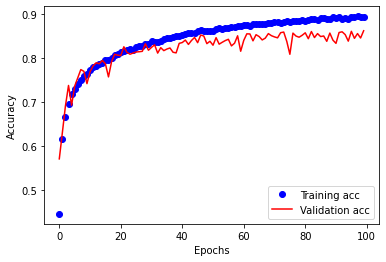

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# using data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True)


In [ ]:
epochs = 300
# fits the model on batches with real-time data augmentation:
history_augmt = model.fit(datagen.flow(x_tr, y_tr, batch_size=32), steps_per_epoch=x_tr.shape[0] // 32, epochs=epochs, validation_data=(x_val, y_val), validation_batch_size=x_val.shape[0] // 32)
model.save('use_data_augmt_model.h5')

Epoch 1/300
1250/1250 [==============================] - 27s 20ms/step - loss: 2.0439 - acc: 0.2864 - val_loss: 1.4714 - val_acc: 0.5222
Epoch 2/300
1250/1250 [==============================] - 25s 20ms/step - loss: 1.4891 - acc: 0.4654 - val_loss: 1.3245 - val_acc: 0.5595
Epoch 3/300
1250/1250 [==============================] - 25s 20ms/step - loss: 1.3700 - acc: 0.5138 - val_loss: 1.7179 - val_acc: 0.5070
Epoch 4/300
1250/1250 [==============================] - 25s 20ms/step - loss: 1.2876 - acc: 0.5487 - val_loss: 1.3217 - val_acc: 0.5819
Epoch 5/300
1250/1250 [==============================] - 25s 20ms/step - loss: 1.2285 - acc: 0.5752 - val_loss: 1.3301 - val_acc: 0.6065
Epoch 6/300
1250/1250 [==============================] - 25s 20ms/step - loss: 1.1947 - acc: 0.5937 - val_loss: 1.3843 - val_acc: 0.6047
Epoch 7/300
1250/1250 [==============================] - 25s 20ms/step - loss: 1.1638 - acc: 0.6047 - val_loss: 1.5321 - val_acc: 0.6287
Epoch 8/300
1250/1250 [==================

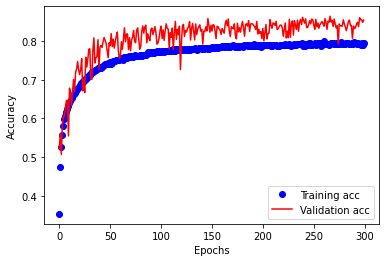

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history_augmt.history['acc']
val_acc = history_augmt.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 3. Train (again) and evaluate the model

- To this end, you have found the "best" hyper-parameters. 
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

### 3.1. Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [6]:
# <Compile your model again (using the same hyper-parameters)>
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))


model.add(Dense(10, activation='softmax'))

from keras import optimizers
 # to be tuned!
learning_rate = 1E-3

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=learning_rate),
              metrics=['acc'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True)

In [7]:
#<Train your model on the entire training set (50K samples)>
#<Use (x_train, y_train_vec) instead of (x_tr, y_tr)>
#<Do NOT use the validation_data option (because now you do not have validation data)>

epochs = 300
# fits the model on batches with real-time data augmentation:
history_final = model.fit(datagen.flow(x_train, y_train_vec, batch_size=32), steps_per_epoch=x_train.shape[0] // 32, epochs=epochs)
model.save('final_model.h5')

Epoch 1/300
1562/1562 [==============================] - 66s 21ms/step - loss: 1.9812 - acc: 0.3014
Epoch 2/300
1562/1562 [==============================] - 32s 21ms/step - loss: 1.4552 - acc: 0.4778
Epoch 3/300
1562/1562 [==============================] - 32s 20ms/step - loss: 1.3162 - acc: 0.5389
Epoch 4/300
1562/1562 [==============================] - 32s 20ms/step - loss: 1.2386 - acc: 0.5750
Epoch 5/300
1562/1562 [==============================] - 32s 20ms/step - loss: 1.1884 - acc: 0.5930
Epoch 6/300
1562/1562 [==============================] - 32s 20ms/step - loss: 1.1666 - acc: 0.6087
Epoch 7/300
1562/1562 [==============================] - 32s 20ms/step - loss: 1.1108 - acc: 0.6255
Epoch 8/300
1562/1562 [==============================] - 31s 20ms/step - loss: 1.1077 - acc: 0.6320
Epoch 9/300
1562/1562 [==============================] - 31s 20ms/step - loss: 1.0594 - acc: 0.6462
Epoch 10/300
1562/1562 [==============================] - 31s 20ms/step - loss: 1.0568 - acc: 0.6456

### 3.2. Evaluate the model on the test set

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [19]:
from keras.models import load_model
model = load_model('non_data_augmt_model.h5')
loss_and_acc = model.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.4570 - acc: 0.8622
loss = 0.4570103883743286
accuracy = 0.8622000217437744


In [ ]:
from keras.models import load_model
model = load_model('use_data_augmt_model.h5')
loss_and_acc = model.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

313/313 [==============================] - 2s 4ms/step - loss: 0.4563 - acc: 0.8533
loss = 0.456317663192749
accuracy = 0.8532999753952026


In [9]:
from keras.models import load_model
model = load_model('final_model.h5')
loss_and_acc = model.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.5047 - acc: 0.8469
loss = 0.5046696066856384
accuracy = 0.8468999862670898
